In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Sentiment.csv') # We remove all extra quotes
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [3]:
df = df[['text','sentiment']]
print(df.head())
print(df.isnull().sum())

                                                text sentiment
0  RT @NancyLeeGrahn: How did everyone feel about...   Neutral
1  RT @ScottWalker: Didn't catch the full #GOPdeb...  Positive
2  RT @TJMShow: No mention of Tamir Rice and the ...   Neutral
3  RT @RobGeorge: That Carly Fiorina is trending ...  Positive
4  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...  Positive
text         0
sentiment    0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder as LE
le = LE()
df['sentiment'] = le.fit_transform(df['sentiment'])
print(df.head(10))

                                                text  sentiment
0  RT @NancyLeeGrahn: How did everyone feel about...          1
1  RT @ScottWalker: Didn't catch the full #GOPdeb...          2
2  RT @TJMShow: No mention of Tamir Rice and the ...          1
3  RT @RobGeorge: That Carly Fiorina is trending ...          2
4  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...          2
5  RT @GregAbbott_TX: @TedCruz: "On my first day ...          2
6  RT @warriorwoman91: I liked her and was happy ...          0
7  Going on #MSNBC Live with @ThomasARoberts arou...          1
8  Deer in the headlights RT @lizzwinstead: Ben C...          0
9  RT @NancyOsborne180: Last night's debate prove...          0


In [5]:
# Refining the data

In [6]:
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] # All refined reviews

In [7]:
# Data Refining
for i in range(df.shape[0]):
    review = df['text'][i]
    review = re.sub('[^a-zA-Z]', ' ', review) # Replace everything that is not an alphabet with a space
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not') # Remove 'not' from stopwords to be removed
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    # Converting the list of words back to statement using join function
    review = ' '.join(review)
    corpus.append(review)

In [8]:
print(corpus)

['rt nancyleegrahn everyon feel climat chang question last night exactli gopdeb', 'rt scottwalk catch full gopdeb last night scott best line second walker http co zsff', 'rt tjmshow mention tamir rice gopdeb held cleveland wow', 'rt robgeorg carli fiorina trend hour debat men complet gopdeb say', 'rt danscavino gopdeb w realdonaldtrump deliv highest rate histori presidenti debat trump http co', 'rt gregabbott tx tedcruz first day rescind everi illeg execut action taken barack obama gopdeb foxnew', 'rt warriorwoman like happi heard go moder not anymor gopdeb megynkelli http', 'go msnbc live thomasarobert around pm et gopdeb', 'deer headlight rt lizzwinstead ben carson may brain surgeon perform lobotomi gopdeb', 'rt nancyosborn last night debat prove gopdeb batsask badassteachersa tbat http co g ggji bjd', 'jgreendc realdonaldtrump fair billclinton own phrase gopdeb', 'rt waynedupreeshow woke tweet gopdeb best line night via govmikehuckabe http co ov hxhicv', 'read famili comment great g

## Creating bag of words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) # Limit the number of columns
x = cv.fit_transform(corpus).toarray()
y = df['sentiment']
len(x[0])

1500

In [10]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size = 0.2, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression as LR
svc = LR(C=0.2, max_iter=10000, solver='liblinear')
svc.fit(x_tr,y_tr)

C:\Users\vasub\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = svc.predict(x_te)
y_pred

array([0, 0, 0, ..., 2, 0, 1])

In [23]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
cmatrix = confusion_matrix(y_te, y_pred)
print(cmatrix)
acc = f1_score(y_te,y_pred, average='micro')
acc

[[1526   90   54]
 [ 413  192   37]
 [ 209   47  207]]


0.6936936936936937

AxesSubplot(0.125,0.125;0.62x0.755)


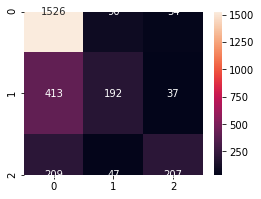

In [24]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (4,3)
print(sb.heatmap(cmatrix, annot=True, fmt='d'))

(array([2148.,    0.,    0.,    0.,    0.,  329.,    0.,    0.,    0.,
        298.]), array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]), <a list of 10 Patch objects>)


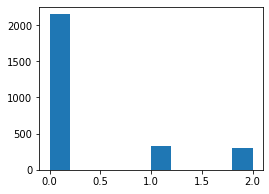

In [25]:
print(plt.hist(y_pred))

In [26]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80      1670
           1       0.58      0.30      0.40       642
           2       0.69      0.45      0.54       463

    accuracy                           0.69      2775
   macro avg       0.66      0.55      0.58      2775
weighted avg       0.68      0.69      0.66      2775

